<a href="https://colab.research.google.com/github/GordoEnForma/TP-Complejidad/blob/main/TP_FUERZABRUTA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##TRABAJO PARCIAL - FUERZA BRUTA
Propuesta de solución usando FB para el problema del viajero

In [ ]:
import pandas as pd
import networkx as nx

In [ ]:
CSV="https://raw.githubusercontent.com/lmcanavals/algorithmic_complexity/main/data/poblaciones.csv"
CP = pd.read_csv(CSV)
CP.head()

,DEPARTAMENTO,PROVINCIA,DISTRITO,CENTRO POBLADO,LATITUD,LONGITUD,NMI1,NMI2
0,AMAZONAS,BAGUA,ARAMANGO,EL MUYO (C.P.L.),-5.422545,-78.45299,311,1206
1,AMAZONAS,BAGUA,ARAMANGO,RESERVA UJUCANO,-5.427565,-78.444372,44,129
2,AMAZONAS,BAGUA,ARAMANGO,TUTUMBEROS,-5.327317,-78.44472,49,179
3,AMAZONAS,BAGUA,BAGUA,ALENYA BAJO,-5.682439,-78.495229,3,8
4,AMAZONAS,BONGARA,CUISPES,MITOPAMPA,-5.93856,-77.965302,1,4


In [ ]:
provincias = CP['PROVINCIA'].unique()
print(len(provincias))
provincias

157


array(['BAGUA', 'BONGARA', 'CHACHAPOYAS', 'UTCUBAMBA', 'ANTONIO RAYMONDI',
       'BOLOGNESI', 'CARHUAZ', 'CASMA', 'HUARAZ', 'HUARI', 'HUAYLAS',
       'OCROS', 'POMABAMBA', 'RECUAY', 'SANTA', 'SIHUAS', 'YUNGAY',
       'ABANCAY', 'ANDAHUAYLAS', 'ANTABAMBA', 'AYMARAES', 'CHINCHEROS',
       'GRAU', 'AREQUIPA', 'CAMANA', 'CARAVELI', 'CASTILLA', 'CAYLLOMA',
       'CONDESUYOS', 'CANGALLO', 'HUAMANGA', 'HUANCA SANCOS', 'HUANTA',
       'LUCANAS', 'PARINACOCHAS', 'VICTOR FAJARDO', 'CAJABAMBA',
       'CAJAMARCA', 'CELENDIN', 'CHOTA', 'CONTUMAZA', 'CUTERVO', 'JAEN',
       'SAN IGNACIO', 'SAN MARCOS', 'SAN MIGUEL', 'SAN MIMGUEL',
       'SANTA CRUZ', 'ACOMAYO', 'CALCA', 'CANAS', 'CANCHIS',
       'CHUMBIVILCAS', 'LA CONVENCION', 'PARURO', 'QUISPICANCHI',
       'PROVINCIA', 'CASTROVIRREYNA', 'CHURCAMPA', 'HUANCAVELICA',
       'HUAYTARA', 'TAYACAJA', 'AMBO', 'DOS DE MAYO', 'DOSDEMAYO',
       'HUAMALIES', 'HUANUCO SANTA', 'HUANUCO', 'LAURICOCHA',
       'LEONCIO PRADO', 'MARAÑON', 'PUERTO I

In [ ]:
# Crear lista a partir de su provincia
def listaDistritos(prov):
  listitaDis = []
  
  for e in range(0,len(CP)):
    if CP['PROVINCIA'][e] == prov and (CP['DISTRITO'][e] not in listitaDis):
      
      listitaDis.append(CP['DISTRITO'][e])

  return listitaDis

In [ ]:
distritoDF = dict()

distritos = listaDistritos('CHICLAYO')

for distrito in distritos:
  distritoDF[distrito] = CP[CP['DISTRITO'] == distrito]


In [ ]:
def listaCP(distrito):
  listitaCP = []
  
  for e in range(0,len(CP)):
    if CP['DISTRITO'][e] == distrito:
      listitaCP.append(CP['CENTRO POBLADO'][e])

  return listitaCP

In [ ]:
centrosPobladosDF = dict()
centrosPoblados = listaCP('NUEVA ARICA')

for cp in centrosPoblados:
  centrosPobladosDF[cp] = distritoDF['NUEVA ARICA'][distritoDF['NUEVA ARICA']['CENTRO POBLADO'] ==cp]


In [ ]:
centrosPoblados

['DOS CORRALES', 'EL PALMO', 'LA VIÑA', 'PAMPA DE LEQUE LEQUE', 'SALDAÑA BAJO']

In [ ]:
from itertools import permutations

In [ ]:
def GenerarRutas(listCP):
  lista = []
  lista = list(permutations(listCP))
  return lista


In [ ]:
rutas= GenerarRutas(centrosPoblados)

In [ ]:
def filtrarRutas(lista,cpInicial):
  #Ubicamos el codigo dentro del gráfo que representa al nomCP
  for data in lista:
    if data[0] == cpInicial:
      code = data[0]
      break
  #Creamos una lista filtrada a partir de ese codigo
  lista_filtrada = [list(x) for x in lista if x[0] == code ]

  #Añadimos la ubicación al final de la lista para su posterior cálculo
  for x in range(len(lista_filtrada)):
    lista_filtrada[x].append(code)

  return lista_filtrada

In [ ]:
posibles_rutas =  filtrarRutas(rutas,'DOS CORRALES')
posibles_rutas

[['DOS CORRALES',
  'EL PALMO',
  'LA VIÑA',
  'PAMPA DE LEQUE LEQUE',
  'SALDAÑA BAJO',
  'DOS CORRALES'],
 ['DOS CORRALES',
  'EL PALMO',
  'LA VIÑA',
  'SALDAÑA BAJO',
  'PAMPA DE LEQUE LEQUE',
  'DOS CORRALES'],
 ['DOS CORRALES',
  'EL PALMO',
  'PAMPA DE LEQUE LEQUE',
  'LA VIÑA',
  'SALDAÑA BAJO',
  'DOS CORRALES'],
 ['DOS CORRALES',
  'EL PALMO',
  'PAMPA DE LEQUE LEQUE',
  'SALDAÑA BAJO',
  'LA VIÑA',
  'DOS CORRALES'],
 ['DOS CORRALES',
  'EL PALMO',
  'SALDAÑA BAJO',
  'LA VIÑA',
  'PAMPA DE LEQUE LEQUE',
  'DOS CORRALES'],
 ['DOS CORRALES',
  'EL PALMO',
  'SALDAÑA BAJO',
  'PAMPA DE LEQUE LEQUE',
  'LA VIÑA',
  'DOS CORRALES'],
 ['DOS CORRALES',
  'LA VIÑA',
  'EL PALMO',
  'PAMPA DE LEQUE LEQUE',
  'SALDAÑA BAJO',
  'DOS CORRALES'],
 ['DOS CORRALES',
  'LA VIÑA',
  'EL PALMO',
  'SALDAÑA BAJO',
  'PAMPA DE LEQUE LEQUE',
  'DOS CORRALES'],
 ['DOS CORRALES',
  'LA VIÑA',
  'PAMPA DE LEQUE LEQUE',
  'EL PALMO',
  'SALDAÑA BAJO',
  'DOS CORRALES'],
 ['DOS CORRALES',
  'LA VIÑA

In [ ]:
centrosPobladosDF

{'DOS CORRALES':      DEPARTAMENTO PROVINCIA     DISTRITO  ...    LONGITUD NMI1 NMI2
 1618   LAMBAYEQUE  CHICLAYO  NUEVA ARICA  ...  -79.366007   13   36
 
 [1 rows x 8 columns],
 'EL PALMO':      DEPARTAMENTO PROVINCIA     DISTRITO  ...    LONGITUD NMI1 NMI2
 1619   LAMBAYEQUE  CHICLAYO  NUEVA ARICA  ...  -79.332908    1    2
 
 [1 rows x 8 columns],
 'LA VIÑA':      DEPARTAMENTO PROVINCIA     DISTRITO  ...    LONGITUD NMI1 NMI2
 1620   LAMBAYEQUE  CHICLAYO  NUEVA ARICA  ...  -79.457594  131  406
 
 [1 rows x 8 columns],
 'PAMPA DE LEQUE LEQUE':      DEPARTAMENTO PROVINCIA     DISTRITO  ...    LONGITUD NMI1 NMI2
 1621   LAMBAYEQUE  CHICLAYO  NUEVA ARICA  ...  -79.366725    3    7
 
 [1 rows x 8 columns],
 'SALDAÑA BAJO':      DEPARTAMENTO PROVINCIA     DISTRITO  ...    LONGITUD NMI1 NMI2
 1622   LAMBAYEQUE  CHICLAYO  NUEVA ARICA  ...  -79.450958    9   30
 
 [1 rows x 8 columns]}

In [ ]:
'DOS CORRALES' in centrosPobladosDF

True

In [ ]:
# Lo mejor de todo el código
def devolverNodo(nombreCP,df):
  if nombreCP in df:
    nodo = df[nombreCP]
  return nodo.values.tolist()
 


In [ ]:
devolverNodo('DOS CORRALES',centrosPobladosDF)[0][4]


'-6.877873'

##Calcular Distancia

In [ ]:
def distancia(p1,p2):
  dist = ((float(p2[0][4]) - float(p1[0][4]))**2 + (float(p2[0][5]) - float(p1[0][5]))**2)**0.5
  return dist

In [ ]:
def calcularDistancia(lista,df):
  distancias = []
  sumaAcumulada = 0
  edges = []
  lista_edges = []
  for i in range(len(lista)):
    for j in range(1,len(lista[i])):
      nodo1 = devolverNodo(lista[i][j-1], df)
      nodo2 =  devolverNodo(lista[i][j],  df)
      sumaAcumulada += distancia(nodo1,nodo2)
      edges.append(distancia(nodo1,nodo2))

    lista_edges.append(edges)
    edges = []

    distancias.append(sumaAcumulada)
    min_value = min(distancias)
    index = distancias.index(min_value)
    
    sumaAcumulada = 0
  return min(distancias), lista[index], index, lista_edges[index]

In [ ]:
minDist,path,index,edges =  calcularDistancia(posibles_rutas,centrosPobladosDF)
edges

[0.03648936010674258,
 0.03990746282338595,
 0.09194587604672444,
 0.007063147810997783,
 0.08672309822071995]

In [ ]:
def crearGraph(path):
  G = nx.DiGraph()
  for e in range(0,len(path)):
    G.add_node(path[e])
  for e in range(0,len(path)-1):
    if(e == len(path)-2):
      G.add_edge(list(G.nodes)[e],list(G.nodes)[0], weight = edges[e] )
      break  
    G.add_edge(list(G.nodes)[e],list(G.nodes)[e+1], weight = edges[e] )
    
  return G

In [ ]:
G = crearGraph(path)
list(G.nodes)

['DOS CORRALES', 'EL PALMO', 'PAMPA DE LEQUE LEQUE', 'LA VIÑA', 'SALDAÑA BAJO']

In [ ]:
import graphviz as gv
import networkx as nx

def nx2gv(G, weighted=False, params={'rankdir': 'LR', 'size': '6'},
          path=None, pathparams={'color':'orangered'}, nodeinfo=False):
  if G.is_directed():
    g = gv.Digraph('G')
  else:
    g = gv.Graph('G')
  g.attr(**params)

  for u in G.nodes:
    if nodeinfo:
      g.node(str(u), **dict(G.nodes[u]))
    else:
      g.node(str(u))

  for u, v in G.edges():
    pp = pathparams if path and path[v] == u else {}

    if weighted:
      g.edge(str(u), str(v), f"{G.edges[u, v]['weight']}", **pp)
    else:
      g.edge(str(u), str(v), **pp)
      
  return g

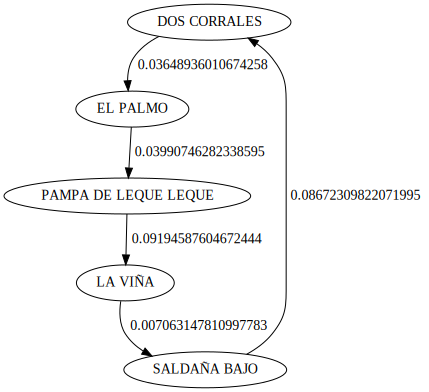

In [ ]:

nx2gv(G, weighted=True, params={'size':'15'})